Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


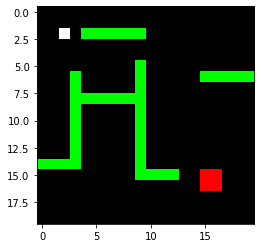

In [1]:
import numpy as np
import matplotlib.pyplot as plt

map_matrix = np.load('lab12_map_matrix.npy')
plt.imshow(map_matrix)
plt.show()

In [3]:
start_rgb = (255, 255, 255)
obstacle_rgb = (0, 30, 0)
goal_rgb = (255, 0, 0)
start_indices = np.argwhere(np.all(map_matrix == start_rgb, axis=-1))
obstacle_rgb = np.argwhere(np.all(map_matrix == obstacle_rgb, axis=-1))
goal_indices = np.argwhere(np.all(map_matrix == goal_rgb, axis=-1))
height = map_matrix.shape[0]
width = map_matrix.shape[1]

In [4]:
reward_matrix = np.empty((height, width))
reward_matrix[:] = -1
for obstacle in obstacle_rgb:
    reward_matrix[obstacle[0], obstacle[1]] = -10
for goal in goal_indices:
    reward_matrix[goal[0], goal[1]] = 10

In [10]:
dx = [0, 1, 0, -1]
dy = [1, 0, -1, 0]
actions = [0, 1, 2, 3]
states = [(x, y) for x in range(height) for y in range(width)]
gamma = 0.8

v = np.zeros_like(reward_matrix)
pi = np.zeros_like(reward_matrix, dtype=np.int)

while True:
    unchanged = True
    for s in states:
        max_v = -np.inf
        max_a = -1
        x,y = s
        for action in actions:
            new_x = x + dx[action]
            new_y = y + dy[action]
            if 0 <= new_x < height and 0 <= new_y < width:
                value = reward_matrix[x, y] + gamma * v[new_x, new_y]
                if max_v < value:
                    max_v = value
                    max_a = action
        action = pi[x, y]
        new_x = x + dx[action]
        new_y = y + dy[action]
        if 0 <= new_x < height and 0 <= new_y < width and max_v <= reward_matrix[x, y] + gamma * v[new_x, new_y]:
            continue
        pi[x,y] = max_a
        unchanged = False
    for s in states:
        x, y = s
        action = pi[x,y]
        new_x = x + dx[action]
        new_y = y + dy[action]
        if 0 <= new_x < height and 0 <= new_y < width:
            v[x,y] = reward_matrix[x, y] + gamma * v[new_x, new_y]
        else:
            v[x,y] = -np.inf
    if unchanged:
        break

next_index = list(start_indices[0])
while next_index not in goal_indices.tolist():
    map_matrix[next_index[0], next_index[1], :] = 255
    action = pi[next_index[0], next_index[1]]
    next_index[0] += dx[action]
    next_index[1] += dy[action]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


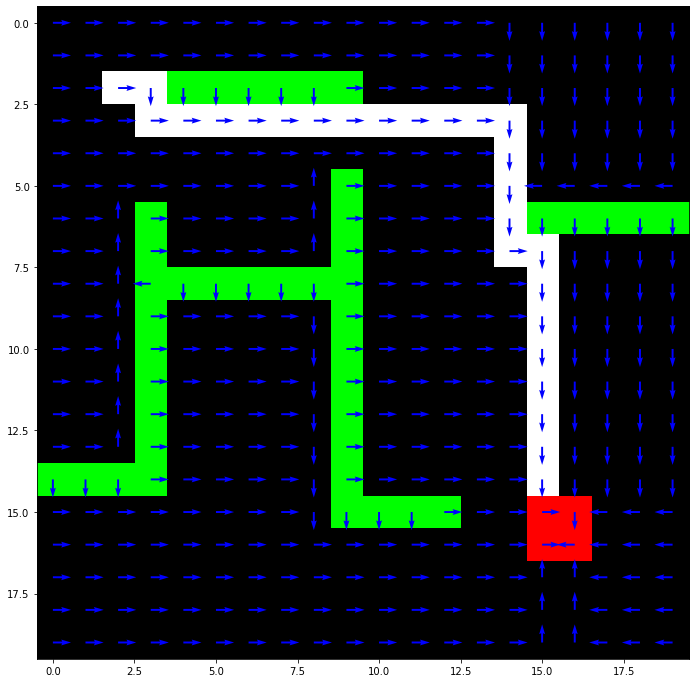

In [11]:

plt.figure(figsize=(12, 12))
plt.imshow(map_matrix)
X, Y = np.meshgrid(np.arange(height), np.arange(width), indexing='xy')
X = X.reshape((height, width))
Y = Y.reshape((height, width))
U = np.array(dx)[pi]
V = np.array(dy)[pi]
plt.quiver(X, Y, V, U, angles='xy', color='blue')
plt.show()